In [64]:
import numpy as np
import matplotlib.pyplot as plt

# TAKING RANDOM POINT

In [65]:
v=np.random.randint(0,100,size=(1000,2))
w=np.random.rand(1000,2)
points=v+w
print(points)

[[94.21798009 59.63643504]
 [19.11745763 37.30930278]
 [19.22361415 58.14968484]
 ...
 [53.42524094 25.81464379]
 [74.47935658 41.40198464]
 [74.58118438 31.49902143]]


# PLOTTING RANDOM POINT

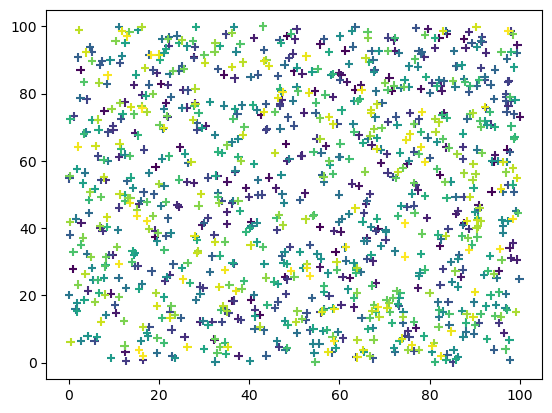

In [131]:
x_coor=points[:,0]
y_coor=points[:,1]
num_points = len(points)
colors = np.arange(num_points)

# Create scatter plot
plt.scatter(x_coor,y_coor,marker='+',c=colors)

# TAKING R AND GIVING NO. OF CELL

In [156]:
r=input()
f=int(r)
cell_size = np.array([f, f])
num_cells=np.ceil(100/f).astype(int)
print(num_cells)

7
15


# GRID

In [171]:
#grid={}

# ASSIGNING POINT TO GRID


In [202]:
cell_indices=np.floor(points/cell_size).astype(int)
print(cell_indices)

[[13  8]
 [ 2  5]
 [ 2  8]
 ...
 [ 7  3]
 [10  5]
 [10  4]]


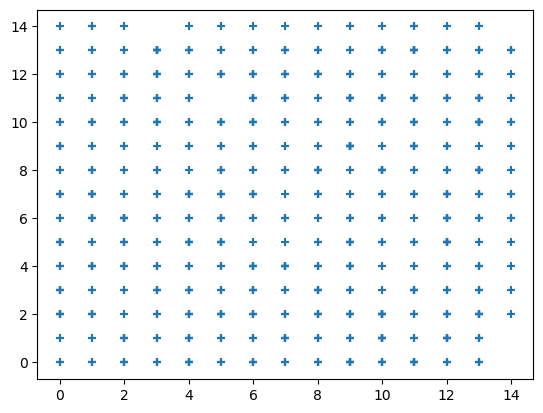

In [173]:
x_coordinate=cell_indices[:,0]
#print(x_coordinate)
y_coordinate=cell_indices[:,1]
#print(y_coordinate)
plt.scatter(x_coordinate,y_coordinate,marker='+')

# GRID

In [255]:
grid = {}
for i, indices in enumerate(cell_indices):
    cell_key = tuple(indices)
    if cell_key in grid:
        grid[cell_key].append(i)
    else:
        grid[cell_key] = [i]
print(grid)        

{(13, 8): [0, 62, 292, 451, 473, 518, 796, 825, 925], (2, 5): [1, 131, 485, 799, 859], (2, 8): [2, 436, 478], (6, 13): [3, 276, 293, 597], (8, 4): [4, 355, 411, 913, 963], (13, 7): [5, 241, 342, 971], (13, 9): [6], (7, 5): [7], (10, 11): [8, 409, 496, 728, 766, 773, 804], (11, 13): [9, 35, 113, 130, 308, 312, 335, 621, 772], (11, 7): [10, 80, 630, 640, 795], (8, 13): [11, 279, 314, 488, 604], (0, 3): [12, 128, 510, 684, 805, 889], (6, 9): [13, 179, 207, 382], (7, 12): [14, 81, 537, 554, 716], (0, 12): [15, 288, 307, 783], (6, 2): [16, 187, 246, 253, 651], (9, 11): [17, 60, 333, 380, 514, 652, 689, 972], (4, 12): [18, 278, 911], (12, 13): [19, 100, 280, 378, 503], (2, 11): [20, 86, 135, 301, 602, 811], (5, 2): [21, 39, 144, 166, 212, 398, 858], (12, 5): [22, 152, 203, 381, 679, 700, 740, 809, 868, 871], (9, 5): [23, 75, 205, 339, 440, 441, 566], (10, 12): [24, 471, 546, 738], (8, 3): [25, 115, 506, 523, 578, 685, 725], (11, 4): [26, 599], (6, 3): [27, 175, 552, 639, 828], (6, 10): [28, 

In [305]:
cells=list(grid.keys())
print(cells)

[(13, 8), (2, 5), (2, 8), (6, 13), (8, 4), (13, 7), (13, 9), (7, 5), (10, 11), (11, 13), (11, 7), (8, 13), (0, 3), (6, 9), (7, 12), (0, 12), (6, 2), (9, 11), (4, 12), (12, 13), (2, 11), (5, 2), (12, 5), (9, 5), (10, 12), (8, 3), (11, 4), (6, 3), (6, 10), (5, 5), (1, 10), (7, 11), (14, 10), (3, 9), (7, 13), (10, 8), (11, 11), (6, 7), (5, 7), (3, 11), (9, 8), (3, 12), (10, 1), (8, 12), (1, 2), (9, 7), (8, 5), (8, 9), (4, 0), (13, 3), (14, 13), (11, 10), (1, 0), (11, 14), (12, 6), (13, 4), (7, 4), (11, 3), (4, 5), (7, 7), (8, 11), (12, 3), (9, 3), (10, 13), (2, 9), (0, 5), (9, 2), (5, 13), (9, 9), (4, 10), (11, 9), (5, 0), (11, 6), (3, 7), (14, 4), (4, 7), (7, 10), (1, 11), (5, 1), (3, 6), (9, 6), (6, 8), (5, 6), (1, 4), (7, 8), (13, 1), (4, 11), (14, 5), (4, 1), (9, 4), (8, 7), (13, 13), (1, 8), (6, 11), (1, 5), (12, 14), (3, 10), (8, 2), (5, 8), (5, 12), (2, 12), (3, 1), (13, 10), (3, 3), (1, 7), (2, 6), (2, 4), (7, 14), (2, 0), (12, 9), (1, 9), (10, 10), (8, 1), (10, 7), (4, 3), (1, 6)

# DISTANCE FUNCTION

In [345]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# GETTING ADJACENT CELLS

In [ ]:
def get_adjacent_cells(current_cell, num_rows, num_columns):
    offsets = [(0, -1), (0, 1), (-1, 0), (1, 0) , (-1,-1), (1,1), (-1,1), (1,-1), (0,0)]
    adjacent_cells = []
    for offset in offsets:
        adjacent_row = current_cell[0] + offset[0]
        adjacent_column = current_cell[1] + offset[1]
        # Check if the adjacent indices are within the valid range of the grid
        if 0 <= adjacent_row < num_rows and 0 <= adjacent_column < num_columns:
            adjacent_cells.append((adjacent_row, adjacent_column))
    return adjacent_cells

a = []
for value in cells:
    a.append(get_adjacent_cells(value,100,100))
print(a)   

In [298]:
k=[]
for b,total1 in enumerate(a):
    x=[]
    for f,n in enumerate(total1):
        x.append(grid[a[b][f][0],a[b][f][1]])
    k.append(x)
print(k)

[[[5, 241, 342, 971], [6], [198, 853, 857, 883], [900], [209, 363, 530, 596, 863, 864, 910], [650, 686], [150, 399, 567, 759], [298, 617, 928], [0, 62, 292, 451, 473, 518, 796, 825, 925]], [[147, 244, 544, 560, 608, 714], [143, 362, 433, 744, 820, 842, 984, 987], [119, 154, 429, 648], [275, 459, 951], [102, 232, 629, 730, 771, 816, 981], [95, 132, 306, 735], [165, 701, 829, 830, 922, 962], [290, 551, 699, 758], [1, 131, 485, 799, 859]], [[277, 291, 501, 861], [74, 196, 366, 653], [117, 419, 462, 698, 724], [351, 548, 673, 909], [140, 226, 320, 593, 611, 760, 905, 908], [33, 942], [155, 225, 657, 918], [88, 125, 431, 696], [2, 436, 478]], [[192, 274, 357, 831, 943, 944], [748], [79, 464, 723], [34, 110, 141, 683, 966], [127, 272, 358, 897, 921], [148], [495, 839], [14, 81, 537, 554, 716], [3, 276, 293, 597]], [[25, 115, 506, 523, 578, 685, 725], [49, 111, 389], [59, 254, 486, 507, 549, 553, 862, 968], [112, 242, 469, 513, 582, 625, 888], [787, 992, 997], [23, 75, 205, 339, 440, 441, 566

In [ ]:
g=np.array(k)


In [ ]:
final_list=[]
for no in g:
    list=[]
    for ko in no:
        list.extend(points[ko])
    array=np.array(list)
    for y in array:
        for j in array:
            distance=euclidean_distance(y,j)
            if distance>0 and distance<=f:
                final_list.append([y,j])
print(final_list)  